# Importing Libraries and mounting drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tqdm


In [ ]:
!pip install yfinance
import yfinance as yf
df_tesla_stock = yf.download('TSLA',start ='2021-01-01', end = '2022-01-01')
df_tesla_stock.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


In [ ]:
df_tesla_stock['month'] = pd.DatetimeIndex(df_tesla_stock.index).month
import calendar
d = dict(enumerate(calendar.month_abbr))
df_tesla_stock['month'] = df_tesla_stock['month'].map(d)
df_tesla_stock.head()

,Open,High,Low,Close,Adj Close,Volume,month
Date,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,Jan
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,Jan
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,Jan
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,Jan
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,Jan


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load data
df= pd.read_csv('2021.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet
0,0,0.0,2021-09-30 23:59:55+00:00,iamfkr2,Returns over the last 10 Years:\n\nBitcoin $BT...
1,1,1.0,2021-09-30 23:59:51+00:00,Jiu_Jase,@garyblack00 I’d love Tesla to put some FCF in...
2,2,2.0,2021-09-30 23:59:44+00:00,tslaMedic,@michael_rigoni @elonmusk @Tesla @WholeMarsBlo...
3,3,3.0,2021-09-30 23:59:40+00:00,1983Deplorable,@28delayslater Tesla didn’t advertise with Con...
4,4,4.0,2021-09-30 23:59:36+00:00,addisskins,@lyndonallydice @coryawhyte @SawyerMerritt I w...


In [ ]:
df = df.sort_values(by = ['Date'], ignore_index = True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet
0,5013710,NaN,2021-01-01 00:00:00,brownri83418546,@patrickbetdavid never short Tesla
1,5013709,NaN,2021-01-01 00:00:00,EarthAccounting,Tesla Supplier CATL To Invest Up To $6B In #Li...
2,5004691,NaN,2021-01-01 00:00:00,brownri83418546,@patrickbetdavid never short Tesla
3,5004690,NaN,2021-01-01 00:00:00,EarthAccounting,Tesla Supplier CATL To Invest Up To $6B In #Li...
4,5004689,NaN,2021-01-01 00:00:01,spleck,@Trumpery45 @greentheonly @xiang_aw @mithunoor...


In [ ]:
print(df.shape)

(5237357, 9)


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df = df.sort_values(by=['Date'], ignore_index = True)
df.head()

KeyError: ignored

# 1. Vader Sentiment model

In [ ]:
#Vader Sentiment scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
Result = []
for i in range(len(df_1)):
  Result.append(sia.polarity_scores(df_1['Tweet'][i]))
  

# df.head()
# df.tail()
  

In [ ]:
len(Result)

In [ ]:
df_Result= pd.DataFrame(Result)
df_Result.head()

,neg,neu,pos,compound
0,0.00,1.000,0.000,0.0000
1,0.00,1.000,0.000,0.0000
2,0.00,1.000,0.000,0.0000
3,0.00,1.000,0.000,0.0000
4,0.17,0.679,0.151,-0.0297


In [ ]:
df = pd.concat([df_1, df_Result], axis = 'columns')
df.tail(10)

In [ ]:
df.head(10)

In [ ]:
df['Tweet'][len(df) - 10]

"@elonmusk Having an app that will allow one to 'Mirror' their smartphone to the Tesla's screen would be a great addition. Would this be something Tesla would consider doing in future updates?"

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'User', 'Tweet', 'neg', 'neu',
       'pos', 'compound'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df = df.sort_values(by=['Date'], ignore_index = True)
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013711 entries, 0 to 5013710
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   Unnamed: 0.1  float64
 2   Date          object 
 3   User          object 
 4   Tweet         object 
 5   neg           float64
 6   neu           float64
 7   pos           float64
 8   compound      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 344.3+ MB


### Daily Analysis

In [ ]:
# df_done2 =pd.read_json('/content/drive/MyDrive/Jeevan Dissertation/Tesla/2021 - WIP/2021_datesdone.json')

df_done2  = df.copy()

In [ ]:
df_done2.head()

,Date,User,Tweet,neg,neu,pos,compound
0,2021-09-30,iamfkr2,Returns over the last 10 Years:\n\nBitcoin $BT...,0.089,0.821,0.091,-0.2263
1,2021-09-30,Jiu_Jase,@garyblack00 I’d love Tesla to put some FCF in...,0.000,0.844,0.156,0.7430
2,2021-09-30,tslaMedic,@michael_rigoni @elonmusk @Tesla @WholeMarsBlo...,0.000,0.648,0.352,0.5859
3,2021-09-30,1983Deplorable,@28delayslater Tesla didn’t advertise with Con...,0.113,0.887,0.000,-0.5719
4,2021-09-30,addisskins,@lyndonallydice @coryawhyte @SawyerMerritt I w...,0.000,0.819,0.181,0.7249


In [ ]:
import datetime
from datetime import datetime
df_done2['Date'] = pd.to_datetime(df_done2['Date'].astype(date)).dt.date
df_done2['Date'] = pd.to_datetime(df_done2['Date'], utc = True)
df_done2.head()

In [ ]:
df_done2['Date'] = pd.to_datetime(df_done2['Date']).dt.date

In [ ]:
df_done2.head()

In [ ]:
df_done2['Month'] = pd.DatetimeIndex(df_done2['Date']).month
import calendar
df_done2['Month'] = df_done2['Month'].apply(lambda x: calendar.month_abbr[x])
df_done2.head()

,Date,User,Tweet,neg,neu,pos,compound,Month
0,2021-09-30,iamfkr2,Returns over the last 10 Years:\n\nBitcoin $BT...,0.089,0.821,0.091,-0.2263,Sep
1,2021-09-30,Jiu_Jase,@garyblack00 I’d love Tesla to put some FCF in...,0.000,0.844,0.156,0.7430,Sep
2,2021-09-30,tslaMedic,@michael_rigoni @elonmusk @Tesla @WholeMarsBlo...,0.000,0.648,0.352,0.5859,Sep
3,2021-09-30,1983Deplorable,@28delayslater Tesla didn’t advertise with Con...,0.113,0.887,0.000,-0.5719,Sep
4,2021-09-30,addisskins,@lyndonallydice @coryawhyte @SawyerMerritt I w...,0.000,0.819,0.181,0.7249,Sep


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


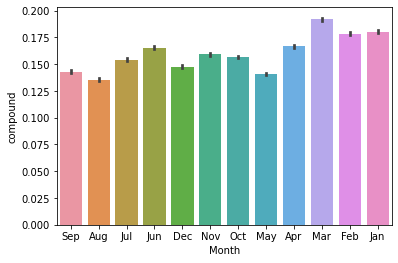

In [ ]:
sns.barplot(x= df_done2['Month'], y = df_done2['compound'])

In [ ]:
df_monthly.head()

,Date,User,Tweet,neg,neu,pos,compound,Month
0,2021-09-30,iamfkr2,Returns over the last 10 Years:\n\nBitcoin $BT...,0.089,0.821,0.091,-0.2263,9
1,2021-09-30,Jiu_Jase,@garyblack00 I’d love Tesla to put some FCF in...,0.000,0.844,0.156,0.7430,9
2,2021-09-30,tslaMedic,@michael_rigoni @elonmusk @Tesla @WholeMarsBlo...,0.000,0.648,0.352,0.5859,9
3,2021-09-30,1983Deplorable,@28delayslater Tesla didn’t advertise with Con...,0.113,0.887,0.000,-0.5719,9
4,2021-09-30,addisskins,@lyndonallydice @coryawhyte @SawyerMerritt I w...,0.000,0.819,0.181,0.7249,9


## Daily analysis

In [ ]:
df_daily = df_done2.groupby(['Date'])['compound'].agg(['mean','count'])
df_daily.loc[:,'Cum'] = df_daily['mean']* df_daily['count']
df_daily.head()

,mean,count,Cum
Date,,,
2021-01-01,0.197775,17789,3518.2156
2021-01-02,0.199419,13679,2727.8497
2021-01-03,0.171426,10325,1769.9729
2021-01-04,0.164629,11314,1862.6105
2021-01-05,0.171060,10394,1777.9966


In [ ]:
df_daily.describe()

,mean,count,Cum
count,365.000000,365.000000,365.000000
mean,0.159390,13736.194521,2210.909256
std,0.038997,6664.819066,1389.470077
min,-0.090735,7122.000000,-1652.913200
25%,0.141587,10649.000000,1551.632500
50%,0.156830,12058.000000,1901.746000
75%,0.173810,14203.000000,2409.153000
max,0.432566,74498.000000,16133.128100


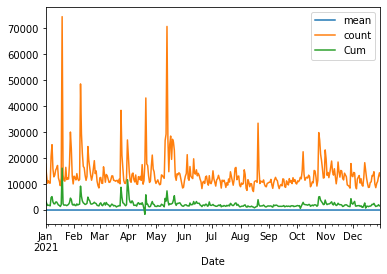

In [ ]:
df_daily.plot()

In [ ]:
df_dailyh = df_daily.pivot('')

### Monthly Analysis

In [ ]:
df_monthly = df_done2.copy()
df_monthly['Month'] = pd.DatetimeIndex(df_monthly['Date']).month
df_monthly.head()

,Date,User,Tweet,neg,neu,pos,compound,Month
0,2021-09-30,iamfkr2,Returns over the last 10 Years:\n\nBitcoin $BT...,0.089,0.821,0.091,-0.2263,9
1,2021-09-30,Jiu_Jase,@garyblack00 I’d love Tesla to put some FCF in...,0.000,0.844,0.156,0.7430,9
2,2021-09-30,tslaMedic,@michael_rigoni @elonmusk @Tesla @WholeMarsBlo...,0.000,0.648,0.352,0.5859,9
3,2021-09-30,1983Deplorable,@28delayslater Tesla didn’t advertise with Con...,0.113,0.887,0.000,-0.5719,9
4,2021-09-30,addisskins,@lyndonallydice @coryawhyte @SawyerMerritt I w...,0.000,0.819,0.181,0.7249,9


In [ ]:
df_Monthly = df_monthly.groupby(['Month'])['compound'].agg(['mean','count'])
df_Monthly.loc[:,'Cum'] = df_Monthly['mean']*df_Monthly['count']
df_Monthly.index = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_Monthly.head()

,mean,count,Cum
January,0.180398,512826,92512.7972
February,0.178642,448308,80086.8282
March,0.192082,421234,80911.3682
April,0.166765,440869,73521.6728
May,0.141034,552987,77989.9701


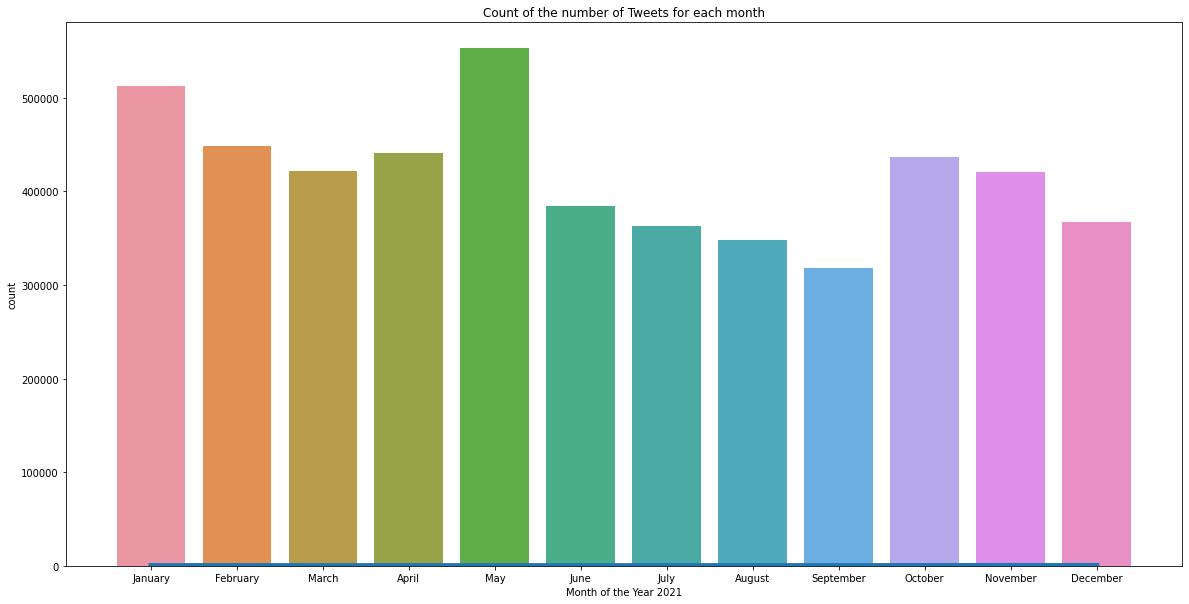

In [ ]:
plt.figure(figsize = (20,10,))
plt.xlabel('Month of the Year 2021')
plt.ylabel('Çount of Tweets')
plt.title('Count of the number of Tweets for each month')
sns.barplot(x = df_Monthly.index, y = df_Monthly['count'])


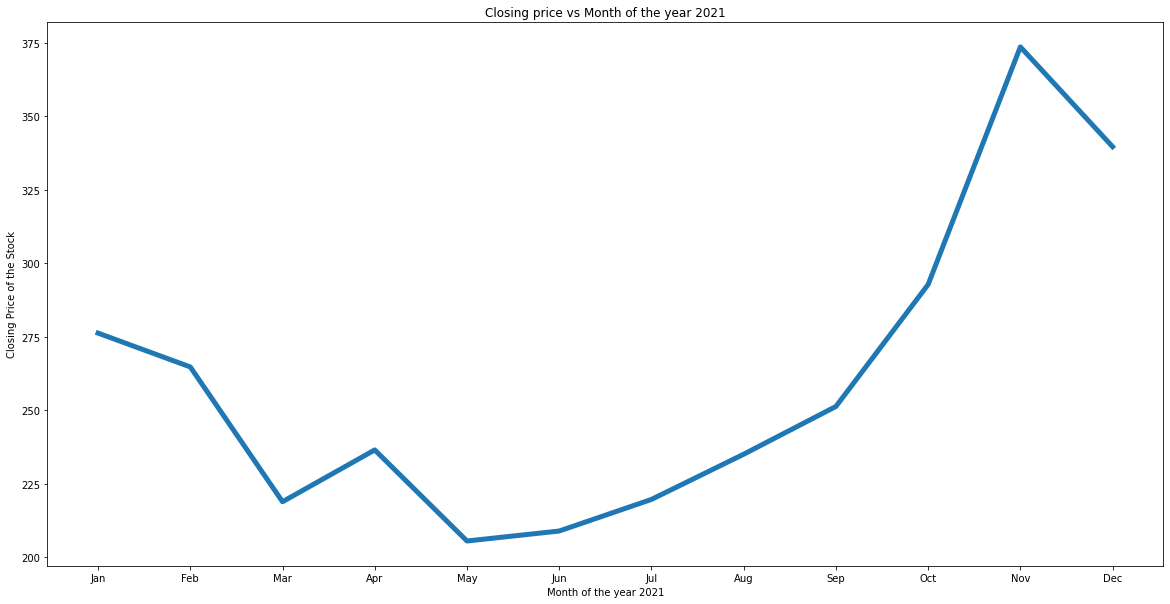

In [ ]:
plt.figure(figsize = (20,10,))
plt.xlabel('Month of the year 2021')
plt.ylabel('Closing Price of the Stock')
plt.title('Closing price vs Month of the year 2021')
sns.lineplot(x = df_tesla_stock['month'], y = df_tesla_stock['Close'], ci = 0, linewidth = 5)

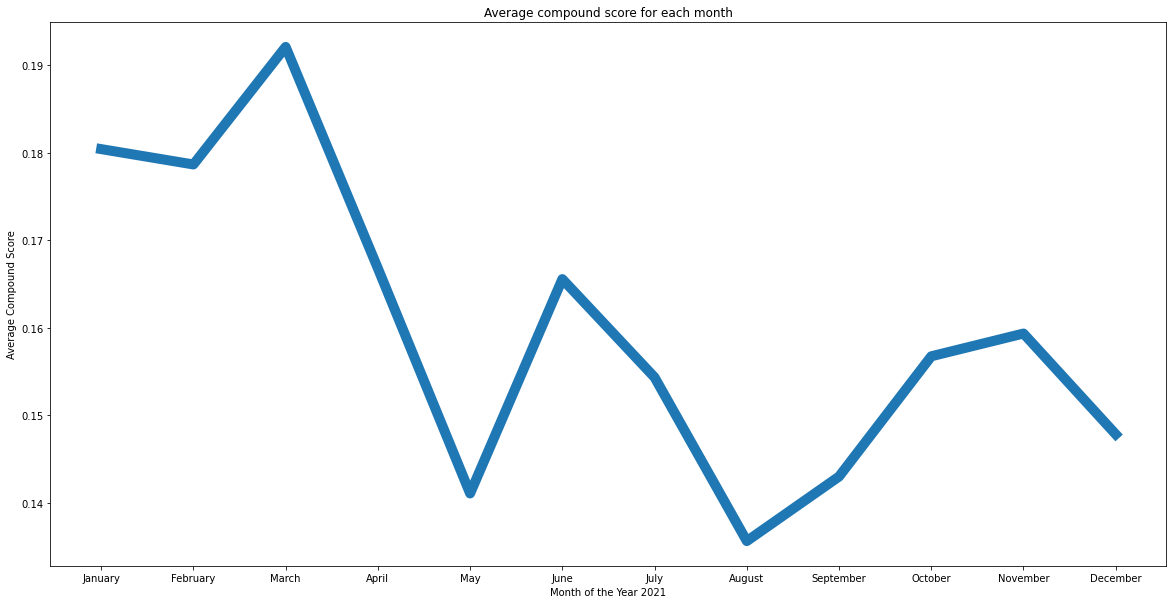

In [ ]:
plt.figure(figsize = (20,10,))
plt.xlabel('Month of the Year 2021')
plt.ylabel('Average Compound Score')
plt.title('Average compound score for each month')
sns.lineplot(data = df_Monthly, x = df_Monthly.index, y = df_Monthly['mean'], linewidth = 10)

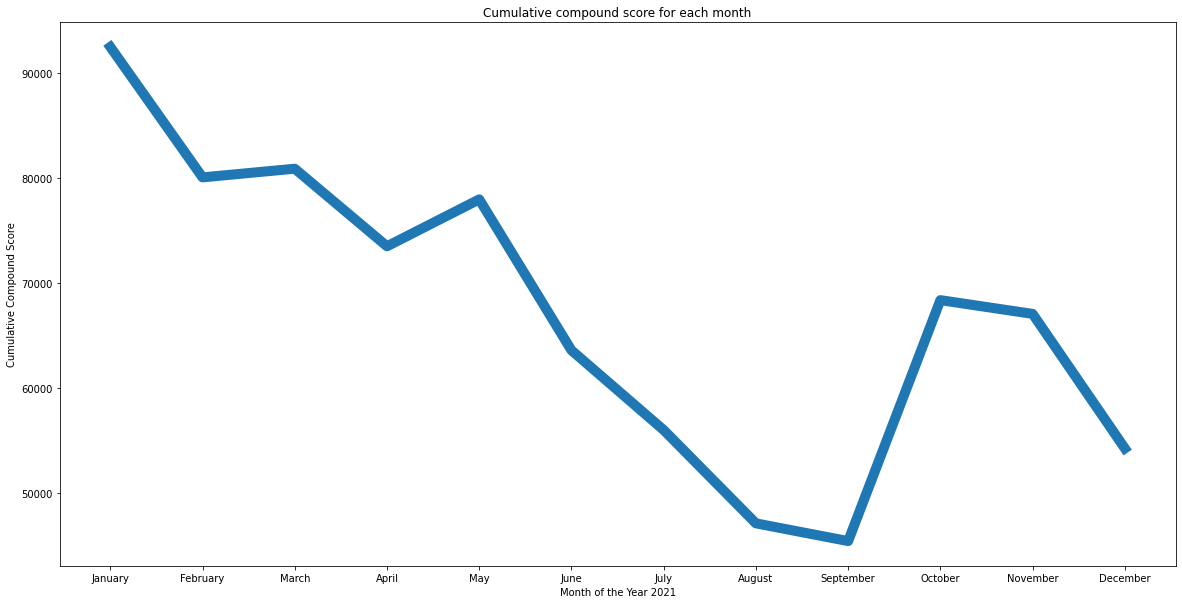

In [ ]:
plt.figure(figsize = (20,10,))
plt.xlabel('Month of the Year 2021')
plt.ylabel('Cumulative Compound Score')
plt.title('Cumulative compound score for each month')
sns.lineplot(data = df_Monthly, x = df_Monthly.index, y = df_Monthly['Cum'], linewidth = 10)

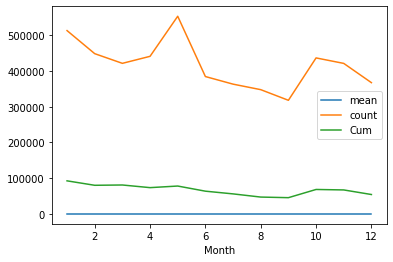

In [ ]:
df_Monthly.plot()

### Monthly datewise analysis

In [ ]:
df_day = df_done2.copy()
df_day['Day'] = pd.DatetimeIndex(df_day['Date']).day
df_day.head()

,Date,User,Tweet,neg,neu,pos,compound,Month,Day
0,2021-09-30,iamfkr2,Returns over the last 10 Years:\n\nBitcoin $BT...,0.089,0.821,0.091,-0.2263,Sep,30
1,2021-09-30,Jiu_Jase,@garyblack00 I’d love Tesla to put some FCF in...,0.000,0.844,0.156,0.7430,Sep,30
2,2021-09-30,tslaMedic,@michael_rigoni @elonmusk @Tesla @WholeMarsBlo...,0.000,0.648,0.352,0.5859,Sep,30
3,2021-09-30,1983Deplorable,@28delayslater Tesla didn’t advertise with Con...,0.113,0.887,0.000,-0.5719,Sep,30
4,2021-09-30,addisskins,@lyndonallydice @coryawhyte @SawyerMerritt I w...,0.000,0.819,0.181,0.7249,Sep,30


In [ ]:
df_Dayh = df_day.pivot_table(index = 'Day', columns = 'Month', values = 'compound',aggfunc = 'mean')
df_Dayh = df_Dayh[['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
df_Dayh.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,0.197775,0.172844,0.196039,0.406370,0.138768,0.166709,0.164227,0.142153,0.140709,0.162339,0.165819,0.174824
2,0.199419,0.142361,0.221135,0.279596,0.124498,0.152312,0.142489,0.140896,0.146049,0.154576,0.137252,0.194957
3,0.171426,0.146031,0.185951,0.264420,0.147655,0.141763,0.146164,0.153146,0.133628,0.145354,0.155796,0.232774
4,0.164629,0.168095,0.162332,0.259034,0.144771,0.076251,0.155464,0.145989,0.134285,0.148547,0.160209,0.163441
5,0.171060,0.158736,0.136431,0.256700,0.149495,0.134931,0.158348,0.121449,0.133369,0.049535,0.187427,0.185024


Text(0.5, 1.0, 'Average sentiment of the Day for Tesla Stocks on year 2021')

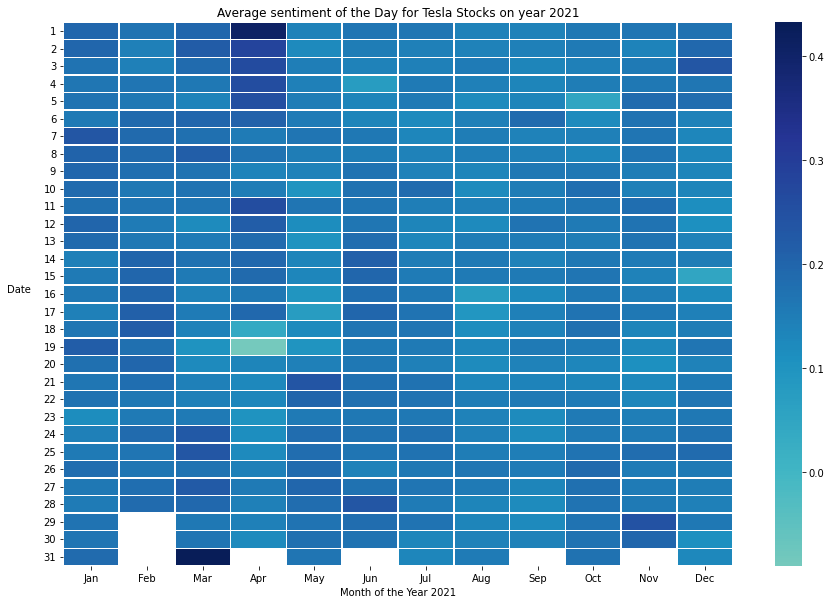

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df_Dayh, linewidths = 0.5,cmap="YlGnBu",center = 0)
plt.yticks(rotation = 0)
plt.xlabel('Month of the Year 2021')
plt.ylabel('Date             ', rotation = 0)
plt.title('Average sentiment of the Day for Tesla Stocks on year 2021')

Text(0.5, 1.0, 'Count of Tweets for Tesla Stocks on year 2021')

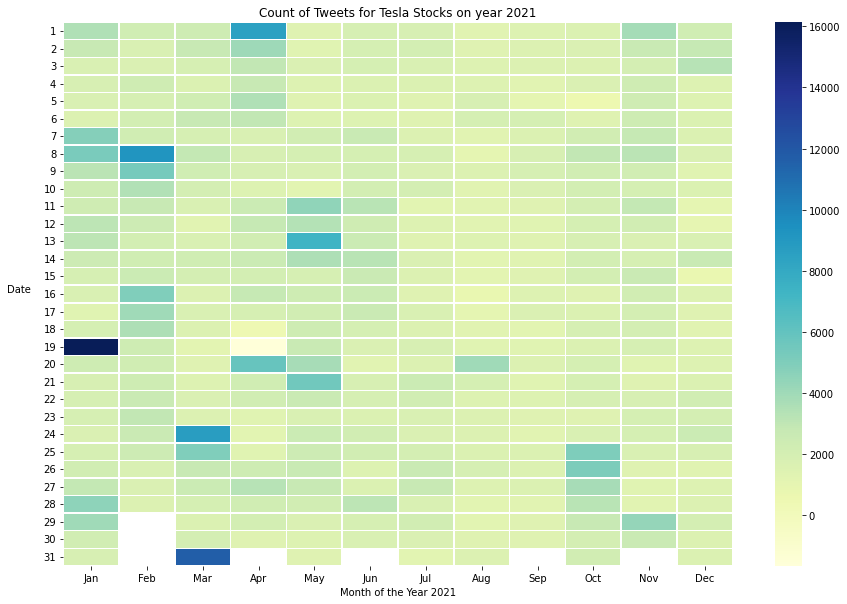

In [ ]:
df_Dayhc = df_day.pivot_table(index = 'Day', columns = 'Month', values = 'compound',aggfunc='sum')
df_Dayhc = df_Dayhc[['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
plt.figure(figsize = (15,10))
sns.heatmap(df_Dayhc, linewidths = 0.5,cmap="YlGnBu")
plt.yticks(rotation = 0)
plt.xlabel('Month of the Year 2021')
plt.ylabel('Date             ', rotation = 0)
plt.title('Count of Tweets for Tesla Stocks on year 2021')

In [ ]:
df_heatcum = pd.DataFrame(df_Dayh.values * df_Dayhc.values, columns = df_Dayh.columns, index = df_Dayh.index)
df_heatcum.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,695.814324,389.900312,476.853044,3463.736653,197.320867,315.243087,309.164143,181.442129,211.731721,263.802597,636.696016,392.436251
2,543.984501,254.326846,614.141680,1144.861176,168.979567,303.417621,306.636960,206.516496,228.681490,268.662711,371.225689,549.979743
3,303.419280,247.262545,358.467967,783.992539,253.404202,282.099293,256.025514,232.449225,210.921704,230.400077,324.859982,774.176084
4,306.639374,396.430936,270.235207,717.015768,220.779494,124.033035,258.511487,216.985260,175.365625,252.216405,371.451736,247.948568
5,304.143920,305.312392,309.819985,910.604719,217.520811,220.988767,231.232852,228.504167,148.524206,30.886777,438.057779,279.931756


Text(0.5, 1.0, 'Cumulative Sentiment of the Day for Tesla Stocks on year 2021')

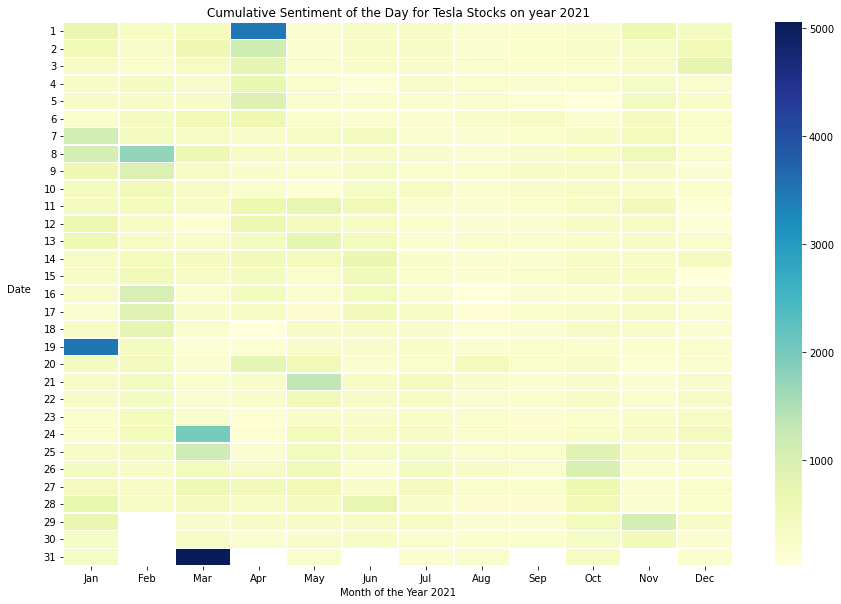

In [ ]:
plt.figure(figsize = (15,10))
sns.color_palette("dark:salmon_r", as_cmap=True)
sns.heatmap(df_heatcum, linewidths = 0.5,cmap="YlGnBu")
plt.yticks(rotation = 0)
plt.xlabel('Month of the Year 2021')
plt.ylabel('Date             ', rotation = 0)
plt.title('Cumulative Sentiment of the Day for Tesla Stocks on year 2021')

In [ ]:
df_Dayh.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day,,,,,,,,,,,,
1,0.197775,0.172844,0.196039,0.406370,0.138768,0.166709,0.164227,0.142153,0.140709,0.162339,0.165819,0.174824
2,0.199419,0.142361,0.221135,0.279596,0.124498,0.152312,0.142489,0.140896,0.146049,0.154576,0.137252,0.194957
3,0.171426,0.146031,0.185951,0.264420,0.147655,0.141763,0.146164,0.153146,0.133628,0.145354,0.155796,0.232774
4,0.164629,0.168095,0.162332,0.259034,0.144771,0.076251,0.155464,0.145989,0.134285,0.148547,0.160209,0.163441
5,0.171060,0.158736,0.136431,0.256700,0.149495,0.134931,0.158348,0.121449,0.133369,0.049535,0.187427,0.185024


In [ ]:
sns.scatterplot(df)

In [ ]:
df_Dayh = df_day.groupby(['Day'])['Month','compound'].mean()
df_Dayh.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(31, 1)

In [ ]:
df_Day = df_day.groupby(['Day'])['compound'].agg(['mean','count'])
df_Day.loc[:,'Cum'] = df_Day['mean']*df_Day['count']
df_Day.head()

,mean,count,Cum
Day,,,
1,0.198927,162955,32416.1239
2,0.170897,159060,27182.9441
3,0.169014,141444,23906.0327
4,0.151412,143938,21793.9726
5,0.152620,141145,21541.5647


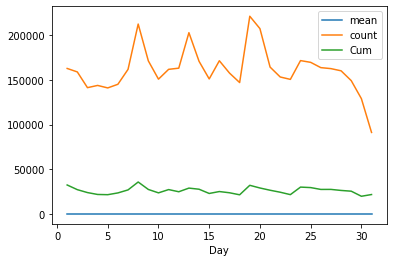

In [ ]:
df_Day.plot()

### Week day wise analysis

In [ ]:
# Day of the week
df_weekly = df_done2.copy()
df_weekly['Weekday'] = pd.DatetimeIndex(df_weekly['Date']).dayofweek
df_weekly.head()

,Date,User,Tweet,neg,neu,pos,compound,Month,Weekday
0,2021-09-30,iamfkr2,Returns over the last 10 Years:\n\nBitcoin $BT...,0.089,0.821,0.091,-0.2263,Sep,3
1,2021-09-30,Jiu_Jase,@garyblack00 I’d love Tesla to put some FCF in...,0.000,0.844,0.156,0.7430,Sep,3
2,2021-09-30,tslaMedic,@michael_rigoni @elonmusk @Tesla @WholeMarsBlo...,0.000,0.648,0.352,0.5859,Sep,3
3,2021-09-30,1983Deplorable,@28delayslater Tesla didn’t advertise with Con...,0.113,0.887,0.000,-0.5719,Sep,3
4,2021-09-30,addisskins,@lyndonallydice @coryawhyte @SawyerMerritt I w...,0.000,0.819,0.181,0.7249,Sep,3


The days here are from 0 - Monday to 6- Sunday

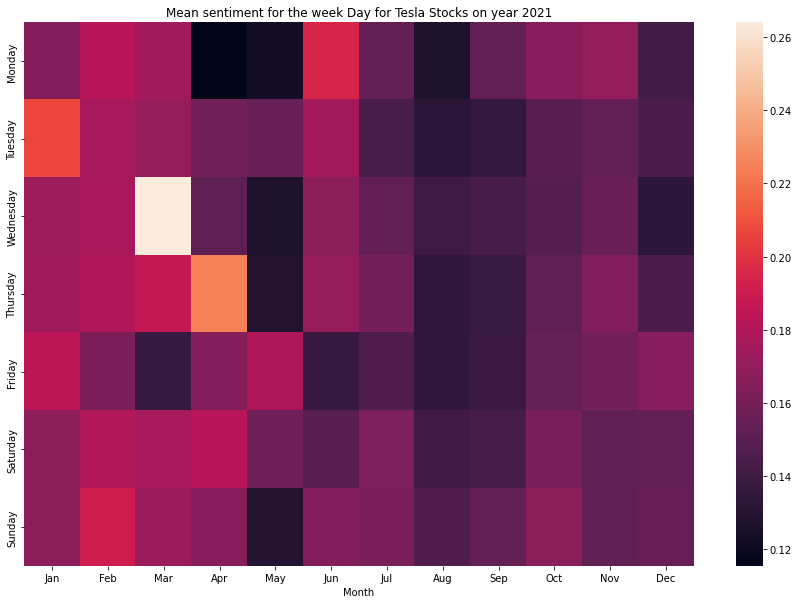

In [ ]:
df_weeklypivot = df_weekly.pivot_table(index = 'Weekday',columns = 'Month', values = 'compound', aggfunc = 'mean')
df_weeklypivot.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_weeklypivot = df_weeklypivot[['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

plt.figure(figsize = (15,10))
# sns.color_palette("dark:salmon_r", as_cmap=True)
# sns.heatmap(df_heatcum, linewidths = 0.5)
plt.yticks(rotation = 0)
plt.xlabel('Month of the Year 2021')
plt.ylabel('Weekday', rotation  = 0)
plt.title('Mean sentiment for the week Day for Tesla Stocks on year 2021')
sns.heatmap(df_weeklypivot)

In [ ]:
df_Weekly = df_weekly.groupby(['Weekday'])['compound'].agg(['mean', 'count'])
df_Weekly.loc[:,'Cum'] = df_Weekly['mean']*df_Weekly['count']
df_Weekly.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_Weekly.head()

,mean,count,Cum
Monday,0.157197,744180,116982.8274
Tuesday,0.163143,813944,132789.5546
Wednesday,0.166247,748411,124420.9225
Thursday,0.162154,791584,128358.4497
Friday,0.156833,770749,120879.2567


Text(0.5, 1.0, 'Count of tweets vs Day of the week')

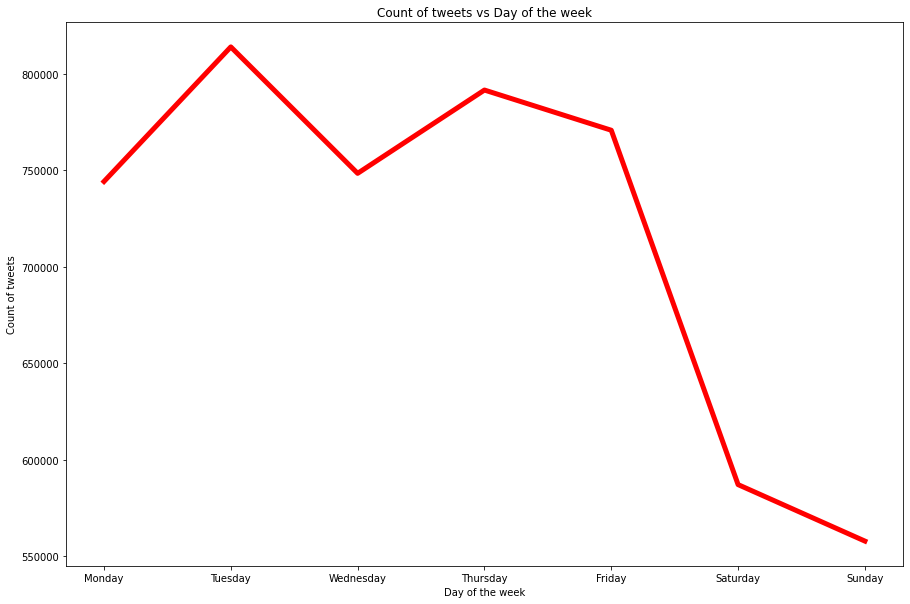

In [ ]:
plt.figure(figsize = (15,10))
sns.lineplot(x= df_Weekly.index, y = df_Weekly['count'], linewidth = 5,color ='r')
plt.xlabel('Day of the week')
plt.ylabel('Count of tweets')
plt.title('Count of tweets vs Day of the week')

Text(0.5, 1.0, 'Mean Sentiment of tweets vs Day of the week')

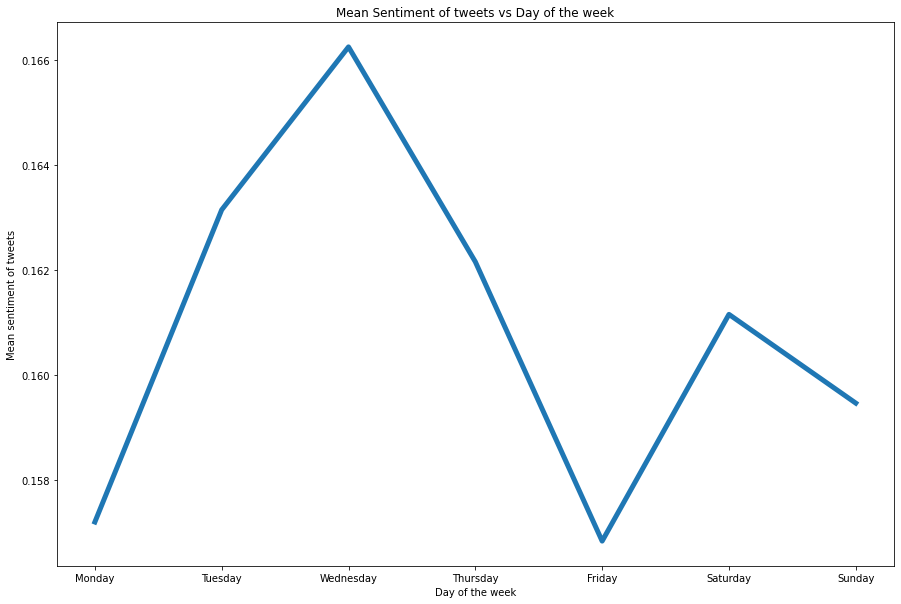

In [ ]:
plt.figure(figsize = (15,10))
sns.lineplot(x= df_Weekly.index, y = df_Weekly['mean'], linewidth = 5)
plt.xlabel('Day of the week')
plt.ylabel('Mean sentiment of tweets')
plt.title('Mean Sentiment of tweets vs Day of the week')

## 2. Roberta pretrained model

In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
polarity_scores_roberta(df['Tweet'][0])

{'roberta_neg': 0.0026023567,
 'roberta_neu': 0.34424308,
 'roberta_pos': 0.65315455}